# Custom Regression Models: Implementation and Validation

## Imports

In [57]:
from linear_regression import *
from logistic_regression import *
from sklearn.datasets import make_regression,make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression as SKLinear

## Linear Regression: Implementation Check & Evaluation

In [58]:
## Create Data
X, y = make_regression(n_samples=1000, n_features=5, noise=10, random_state=42)
print(X[:5])
print(y[:5])

[[ 2.05654356  0.60685059  0.48268789 -1.13088844  0.42009449]
 [-0.79919201 -0.64596418 -0.18289644 -0.48274352  1.37487642]
 [ 1.07600714 -0.79602586 -0.75196933  0.02131165 -0.31905394]
 [-0.10325476 -0.82849702  1.48986344 -1.64318881 -1.60090398]
 [-2.06340315  0.50325206 -0.64557207 -0.31735049 -1.66108342]]
[ 70.77131405 -51.6042361  -37.00044751 -83.53509879 -83.4003936 ]


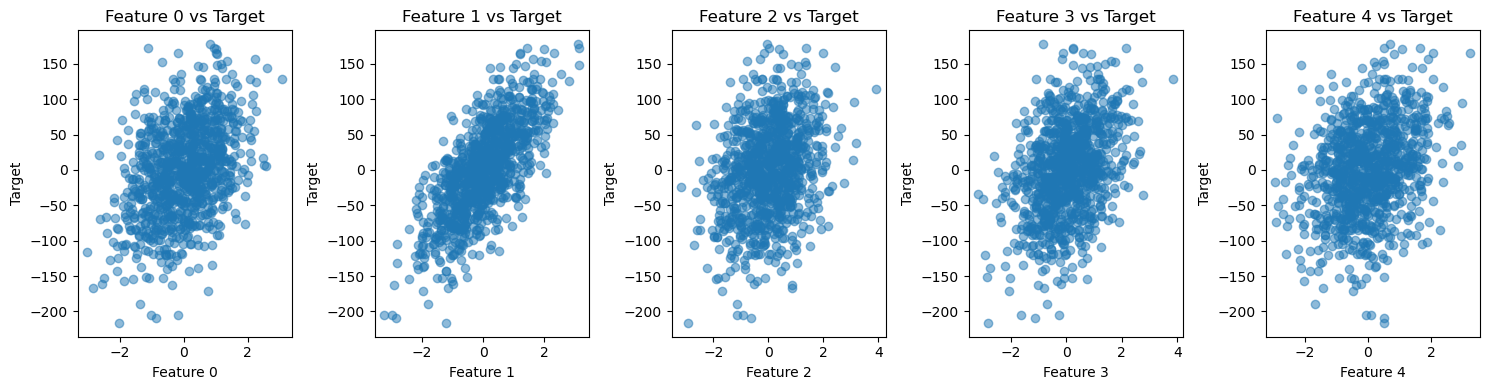

In [59]:
## Features vs Target

n_features = X.shape[1]

plt.figure(figsize=(15, 4))
for i in range(n_features):
    plt.subplot(1, n_features, i+1)
    plt.scatter(X[:, i], y, alpha=0.5)
    plt.xlabel(f"Feature {i}")
    plt.ylabel("Target")
    plt.title(f"Feature {i} vs Target")

plt.tight_layout()
plt.show()

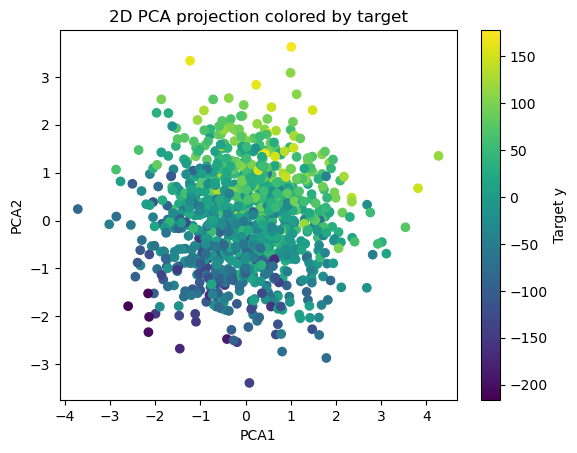

In [60]:
## Data Visulazation
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='viridis')
plt.colorbar(label='Target y')
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("2D PCA projection colored by target")
plt.show()

In [61]:
## Split Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [62]:
## Train Model
model = LinearRegression(learning_rate=0.1, iterations=1000,lambda_=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(y_pred[:5])
print(y_test[:5])

print(model.weights)
print(model.bias)


[-54.84933949 -64.71114563  50.87319115 -17.47943264  61.64039691]
[-49.53925994 -58.2262595   47.17114352  -4.06344173  56.86464899]
[26.76363446 46.10726102 16.64331391 24.24185645 19.69763028]
0.21751271349814666


In [63]:
# Evaluate model
mse, rmse = model.evaluate(X_test, y_test)
baseline_pred = np.full_like(y_test, y_train.mean())
baseline_mse = np.sum((y_test - baseline_pred) ** 2) / (2 * y_test.shape[0])
baseline_rmse = np.sqrt(np.mean((y_test - baseline_pred) ** 2))

print("=== Linear Regression ===")
print(f"Baseline MSE: {baseline_mse:.4f}")
print(f"Model MSE   : {mse:.4f}")
print(f"Baseline RMSE: {baseline_rmse:.4f}")
print(f"Model RMSE   : {rmse:.4f}")
print(f"Target range : {y_test.min():.2f} to {y_test.max():.2f}\n")

=== Linear Regression ===
Baseline MSE: 1916.3354
Model MSE   : 55.4811
Baseline RMSE: 61.9086
Model RMSE   : 10.5339
Target range : -160.93 to 164.99



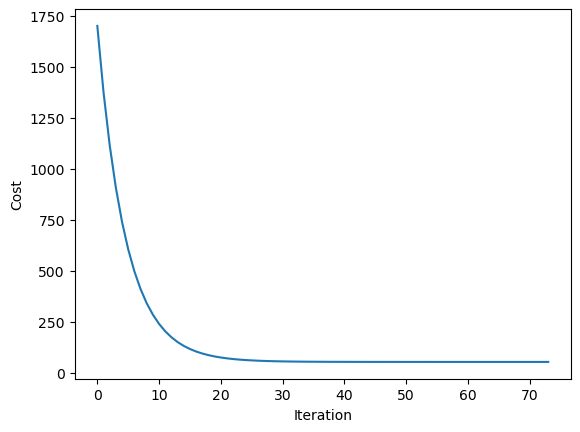

In [64]:
plt.plot(model.cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

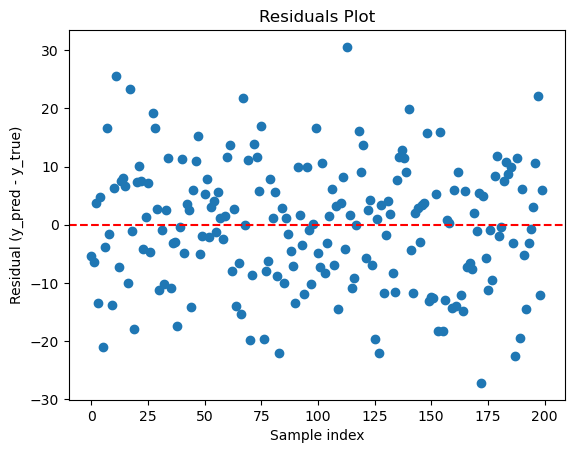

In [65]:
plt.scatter(range(len(y_test)), y_pred - y_test)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Sample index")
plt.ylabel("Residual (y_pred - y_true)")
plt.title("Residuals Plot")
plt.show()

### Effect of Noise on Linear Regression

Linear regression performs well when the features have a clear linear pattern with the target. With low noise, the model can capture this pattern, achieving lower MSE and RMSE than a simple baseline predicting the mean. However, as noise increases, random variation dominates, making it hard for the model to learn meaningful patterns. In very noisy datasets, the baseline may perform as well as or even better than the regression model.

## Linear Regression: With vs Without L2 Regularization

In [66]:
# Dataset 1: Easy (minimal difference)

X_easy, y_easy = make_regression(
    n_samples=500,   # moderate number of samples
    n_features=5,    # few features
    noise=10,        # low noise
    random_state=42
)

# Dataset 2: Challenging (noticeable difference)

X_chall, y_chall = make_regression(
    n_samples=200,
    n_features=20,   # many features
    noise=50,        # higher noise
    random_state=42
)

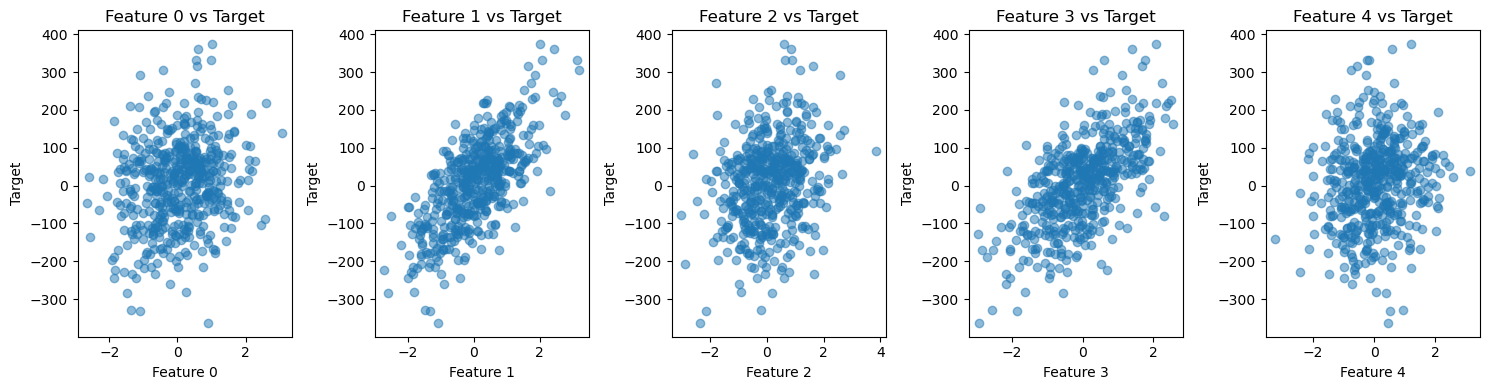

In [67]:
## Features vs Target

n_features = X_easy.shape[1]

plt.figure(figsize=(15, 4))
for i in range(n_features):
    plt.subplot(1, n_features, i+1)
    plt.scatter(X_easy[:, i], y_easy, alpha=0.5)
    plt.xlabel(f"Feature {i}")
    plt.ylabel("Target")
    plt.title(f"Feature {i} vs Target")

plt.tight_layout()
plt.show()


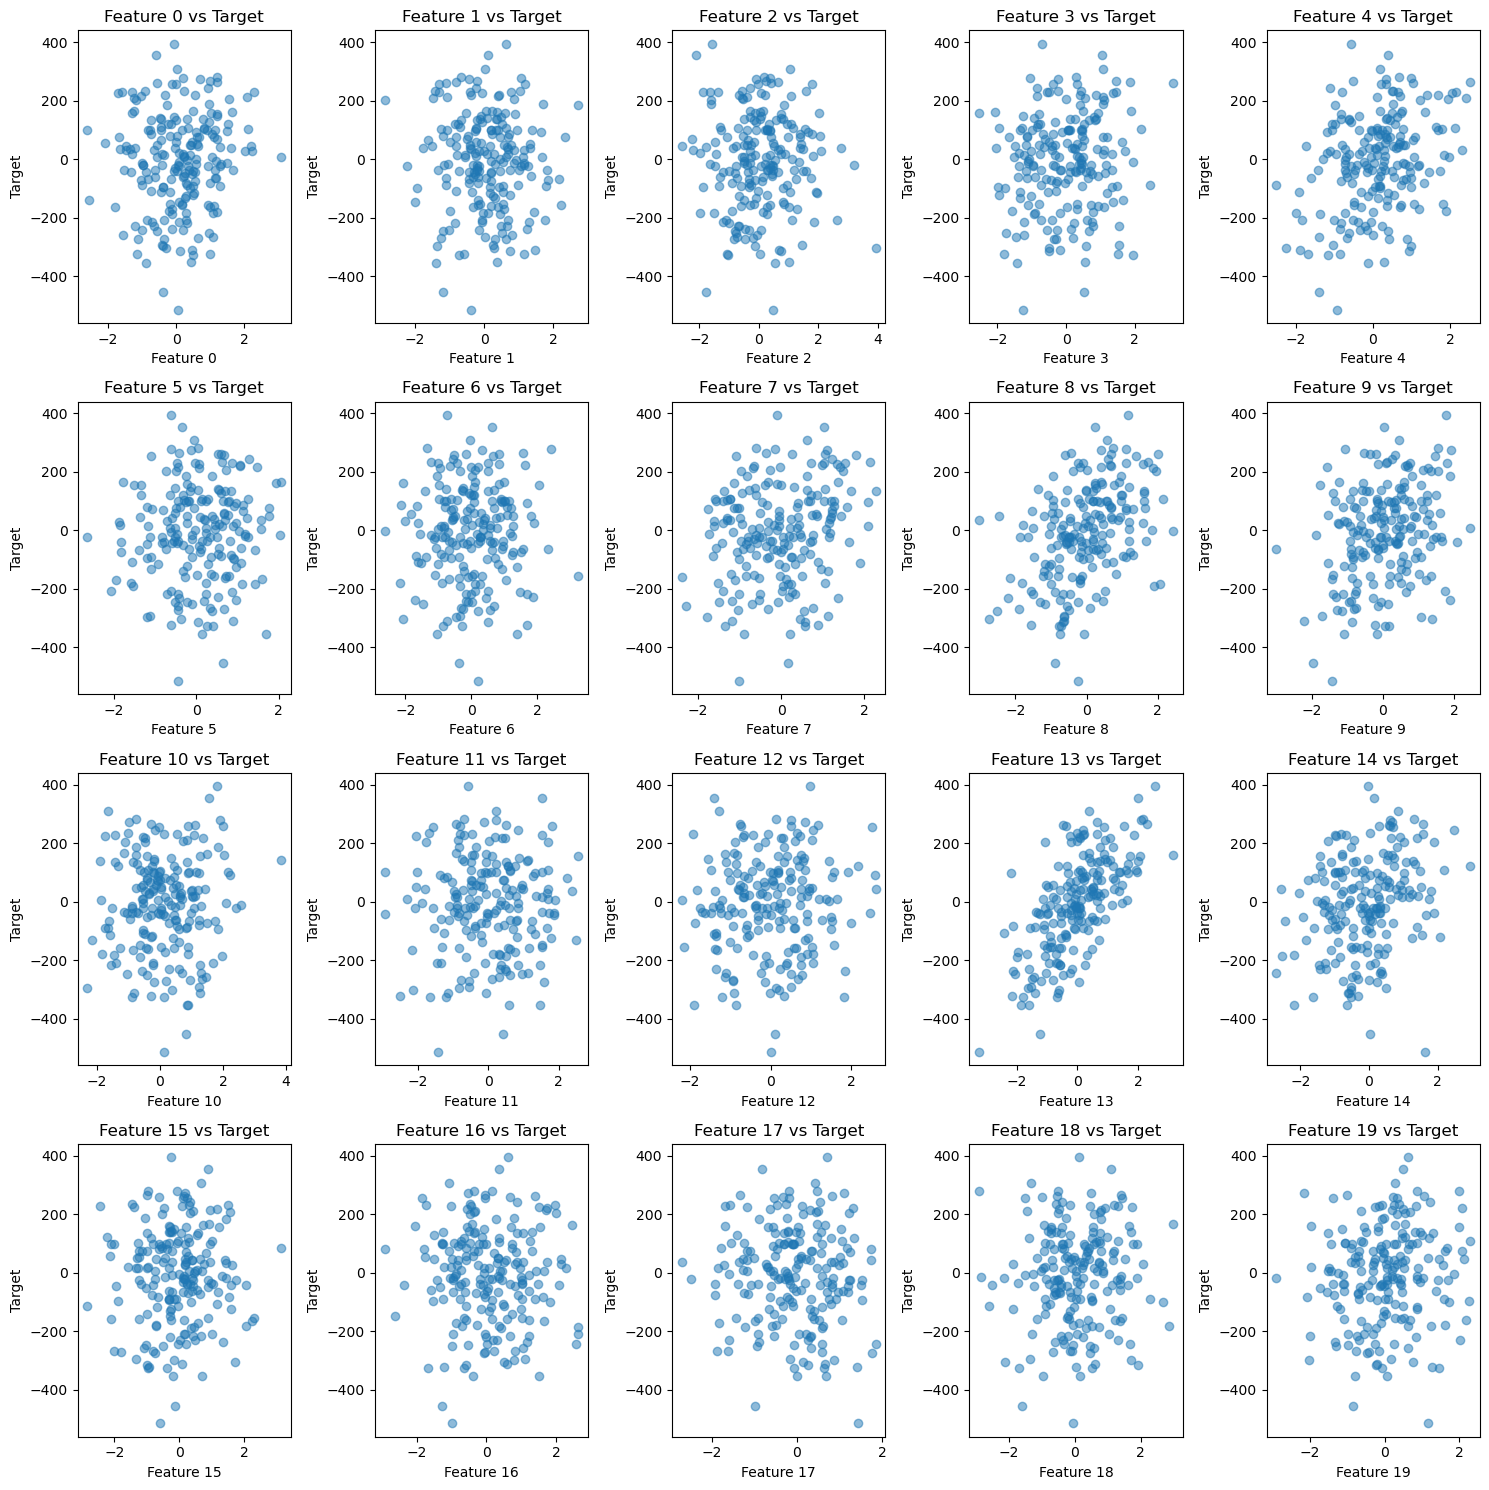

In [68]:
n_features = X_chall.shape[1]


plt.figure(figsize=(15, 15))

for i in range(n_features):
    plt.subplot(4, 5, i+1)
    plt.scatter(X_chall[:, i], y_chall, alpha=0.5)
    plt.xlabel(f"Feature {i}")
    plt.ylabel("Target")
    plt.title(f"Feature {i} vs Target")

plt.tight_layout()
plt.show()

In [69]:
scaler_easy = StandardScaler()
X_easy = scaler_easy.fit_transform(X_easy)

scaler_chall = StandardScaler()
X_chall = scaler_chall.fit_transform(X_chall)

X_train_easy, X_test_easy, y_train_easy, y_test_easy = train_test_split(X_easy, y_easy, test_size=0.2, random_state=42)
X_train_chall, X_test_chall, y_train_chall, y_test_chall = train_test_split(X_chall, y_chall, test_size=0.2, random_state=42)

In [70]:
# Train normal model in easy dataset
normal_model_easy = LinearRegression(learning_rate=0.1, iterations=1000,lambda_=0)
normal_model_easy.fit(X_train_easy, y_train_easy)
y_pred_normal = normal_model_easy.predict(X_test_easy)

print(y_pred_normal[:5])
print(y_test_easy[:5])
print("\n")

# Train Regularized model in easy dataset
regularized_model_easy = LinearRegression(learning_rate=0.1, iterations=1000,lambda_=0.01)
regularized_model_easy.fit(X_train_easy, y_train_easy)
y_pred_regularized = regularized_model_easy.predict(X_test_easy)

print(y_pred_regularized[:5])
print(y_test_easy[:5])
print("\n")

# Compare weights

print(f"Regularized weights: {regularized_model_easy.weights}")
print(f"Normal weights: {normal_model_easy.weights}\n")

# Compare bias
print(f"Regularized bias: {regularized_model_easy.bias}")
print(f"Normal bias: {normal_model_easy.bias}")

[ -38.20835121    6.58175204    7.45615382 -123.23642762   54.60489119]
[ -49.52212137   -2.54416639  -14.0915109  -117.6568234    61.79521615]


[ -38.20749363    6.58178595    7.45593145 -123.23319554   54.60350102]
[ -49.52212137   -2.54416639  -14.0915109  -117.6568234    61.79521615]


Regularized weights: [27.43743283 79.15713407 30.97441571 71.3024319  10.39433901]
Normal weights: [27.43811958 79.15908602 30.97518603 71.30406296 10.39448506]

Regularized bias: 6.956255094861095
Normal bias: 6.956334689966197


In [71]:
# Evaluate Normal Model (Easy Dataset)

mse_test_normal, rmse_test_normal = normal_model_easy.evaluate(X_test_easy, y_test_easy)
mse_train_normal, rmse_train_normal = normal_model_easy.evaluate(X_train_easy, y_train_easy)

baseline_pred = np.full_like(y_test_easy, y_train_easy.mean())
baseline_mse = np.sum((y_test_easy - baseline_pred) ** 2) / (2 * y_test_easy.shape[0])
baseline_rmse = np.sqrt(np.mean((y_test_easy - baseline_pred) ** 2))

print("=== Normal Linear Regression (Easy Dataset) ===")
print(f"Training MSE : {mse_train_normal:.4f}, RMSE: {rmse_train_normal:.4f}")
print(f"Test MSE     : {mse_test_normal:.4f}, RMSE: {rmse_test_normal:.4f}")
print(f"Baseline MSE : {baseline_mse:.4f}, RMSE: {baseline_rmse:.4f}")
print(f"Target range : {y_test_easy.min():.2f} to {y_test_easy.max():.2f}\n")


# Evaluate Regularized Model (Easy Dataset)

mse_test_reg, rmse_test_reg = regularized_model_easy.evaluate(X_test_easy, y_test_easy)
mse_train_reg, rmse_train_reg = regularized_model_easy.evaluate(X_train_easy, y_train_easy)

print("=== Regularized Linear Regression (Easy Dataset) ===")
print(f"Training MSE : {mse_train_reg:.4f}, RMSE: {rmse_train_reg:.4f}")
print(f"Test MSE     : {mse_test_reg:.4f}, RMSE: {rmse_test_reg:.4f}")
print(f"Baseline MSE : {baseline_mse:.4f}, RMSE: {baseline_rmse:.4f}")
print(f"Target range : {y_test_easy.min():.2f} to {y_test_easy.max():.2f}\n")


=== Normal Linear Regression (Easy Dataset) ===
Training MSE : 44.8013, RMSE: 9.4659
Test MSE     : 53.1473, RMSE: 10.3099
Baseline MSE : 6102.5671, RMSE: 110.4768
Target range : -260.86 to 330.76

=== Regularized Linear Regression (Easy Dataset) ===
Training MSE : 44.8013, RMSE: 9.4659
Test MSE     : 53.1454, RMSE: 10.3097
Baseline MSE : 6102.5671, RMSE: 110.4768
Target range : -260.86 to 330.76



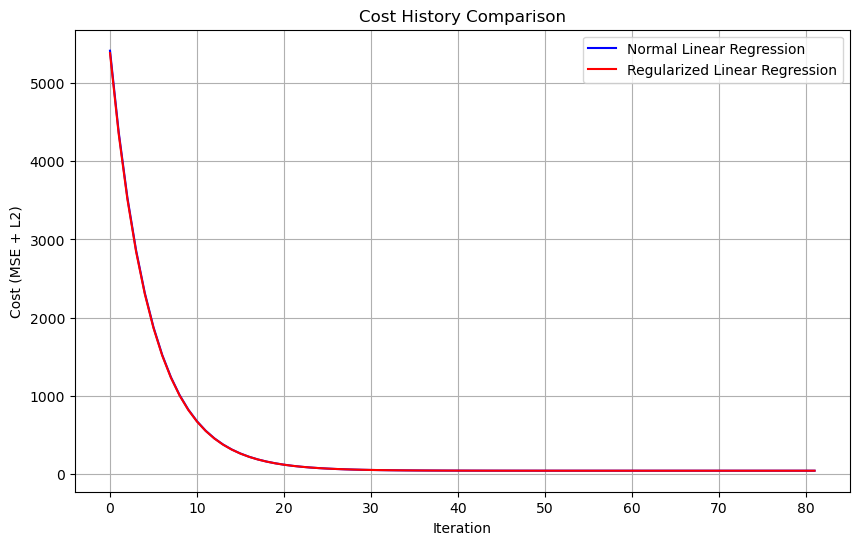

In [72]:
## Compare Cost History
cost_normal = normal_model_easy.cost_history
cost_regularized = regularized_model_easy.cost_history

plt.figure(figsize=(10,6))
plt.plot(cost_normal, label="Normal Linear Regression", color='blue')
plt.plot(cost_regularized, label="Regularized Linear Regression", color='red')
plt.xlabel("Iteration")
plt.ylabel("Cost (MSE + L2)")
plt.title("Cost History Comparison")
plt.legend()
plt.grid(True)
plt.show()

In [73]:
# Train normal model on challenging dataset
normal_model_chall = LinearRegression(learning_rate=0.1, iterations=1000, lambda_=0)
normal_model_chall.fit(X_train_chall, y_train_chall)
y_pred_normal = normal_model_chall.predict(X_test_chall)

print(y_pred_normal[:5])
print(y_test_chall[:5])
print("\n")

# Train regularized model on challenging dataset
regularized_model_chall = LinearRegression(learning_rate=0.1, iterations=1000, lambda_=0.1)
regularized_model_chall.fit(X_train_chall, y_train_chall)
y_pred_regularized = regularized_model_chall.predict(X_test_chall)

print(y_pred_regularized[:5])
print(y_test_chall[:5])
print("\n")

# Compare weights
print(f"Regularized weights: {regularized_model_chall.weights}")
print(f"Normal weights: {normal_model_chall.weights}\n")

# Compare bias
print(f"Regularized bias: {regularized_model_chall.bias}")
print(f"Normal bias: {normal_model_chall.bias}")


[-175.49125213  123.79713884  -88.53964692  -51.74359015  132.10842598]
[-82.68857023 144.33216195 -90.34709119 -20.76586114 135.40515082]


[-175.31883451  123.69050178  -88.44037733  -51.70446181  131.9901236 ]
[-82.68857023 144.33216195 -90.34709119 -20.76586114 135.40515082]


Regularized weights: [-1.30112676e+00 -2.01236220e+00 -3.10499192e+00  2.68026939e+01
  4.40656282e+01  1.06972461e+01 -4.64880624e+00  4.96722496e+01
  6.46920898e+01  4.19268726e+01  1.26741661e+01 -6.00623027e+00
  3.61936095e+00  1.07900017e+02  5.18604910e+01 -1.56829447e+00
  5.06960099e-02  4.35983432e+00  8.06605149e+00  1.31802836e+00]
Normal weights: [-1.31655865e+00 -2.00813677e+00 -3.11137971e+00  2.68233536e+01
  4.40852822e+01  1.06988566e+01 -4.66428023e+00  4.97015659e+01
  6.47305366e+01  4.19472244e+01  1.26868273e+01 -6.02299559e+00
  3.62176714e+00  1.07980936e+02  5.19035695e+01 -1.57276198e+00
  5.84118384e-02  4.36958965e+00  8.07104714e+00  1.30939219e+00]

Regularized bias: -9.2707917

In [74]:
# Evaluate Normal Model (Challenging Dataset)

mse_test_normal, rmse_test_normal = normal_model_chall.evaluate(X_test_chall, y_test_chall)
mse_train_normal, rmse_train_normal = normal_model_chall.evaluate(X_train_chall, y_train_chall)

baseline_pred = np.full_like(y_test_chall, y_train_chall.mean())
baseline_mse = np.sum((y_test_chall - baseline_pred) ** 2) / (2 * y_test_chall.shape[0])
baseline_rmse = np.sqrt(np.mean((y_test_chall - baseline_pred) ** 2))

print("=== Normal Linear Regression (Challenging Dataset) ===")
print(f"Training MSE : {mse_train_normal:.4f}, RMSE: {rmse_train_normal:.4f}")
print(f"Test MSE     : {mse_test_normal:.4f}, RMSE: {rmse_test_normal:.4f}")
print(f"Baseline MSE : {baseline_mse:.4f}, RMSE: {baseline_rmse:.4f}")
print(f"Target range : {y_test_chall.min():.2f} to {y_test_chall.max():.2f}\n")


# Evaluate Regularized Model (Challenging Dataset)

mse_test_reg, rmse_test_reg = regularized_model_chall.evaluate(X_test_chall, y_test_chall)
mse_train_reg, rmse_train_reg = regularized_model_chall.evaluate(X_train_chall, y_train_chall)

print("=== Regularized Linear Regression (Challenging Dataset) ===")
print(f"Training MSE : {mse_train_reg:.4f}, RMSE: {rmse_train_reg:.4f}")
print(f"Test MSE     : {mse_test_reg:.4f}, RMSE: {rmse_test_reg:.4f}")
print(f"Baseline MSE : {baseline_mse:.4f}, RMSE: {baseline_rmse:.4f}")
print(f"Target range : {y_test_chall.min():.2f} to {y_test_chall.max():.2f}\n")


=== Normal Linear Regression (Challenging Dataset) ===
Training MSE : 1151.4441, RMSE: 47.9884
Test MSE     : 1346.4383, RMSE: 51.8929
Baseline MSE : 12777.1108, RMSE: 159.8569
Target range : -353.39 to 394.94

=== Regularized Linear Regression (Challenging Dataset) ===
Training MSE : 1151.4512, RMSE: 47.9886
Test MSE     : 1344.9738, RMSE: 51.8647
Baseline MSE : 12777.1108, RMSE: 159.8569
Target range : -353.39 to 394.94



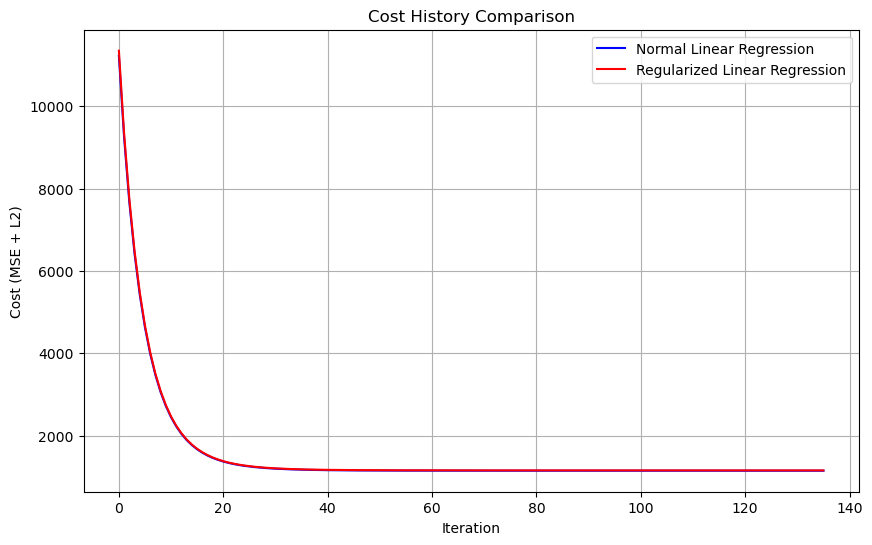

In [75]:
## Compare Cost History
cost_normal = normal_model_chall.cost_history
cost_regularized = regularized_model_chall.cost_history

plt.figure(figsize=(10,6))
plt.plot(cost_normal, label="Normal Linear Regression", color='blue')
plt.plot(cost_regularized, label="Regularized Linear Regression", color='red')
plt.xlabel("Iteration")
plt.ylabel("Cost (MSE + L2)")
plt.title("Cost History Comparison")
plt.legend()
plt.grid(True)
plt.show()

## Custom Linear Regression vs Scikit-Learn

In [76]:
X, y= make_regression(
    n_samples= 1000,
    n_features= 10,
    noise= 50,
    random_state=42
)


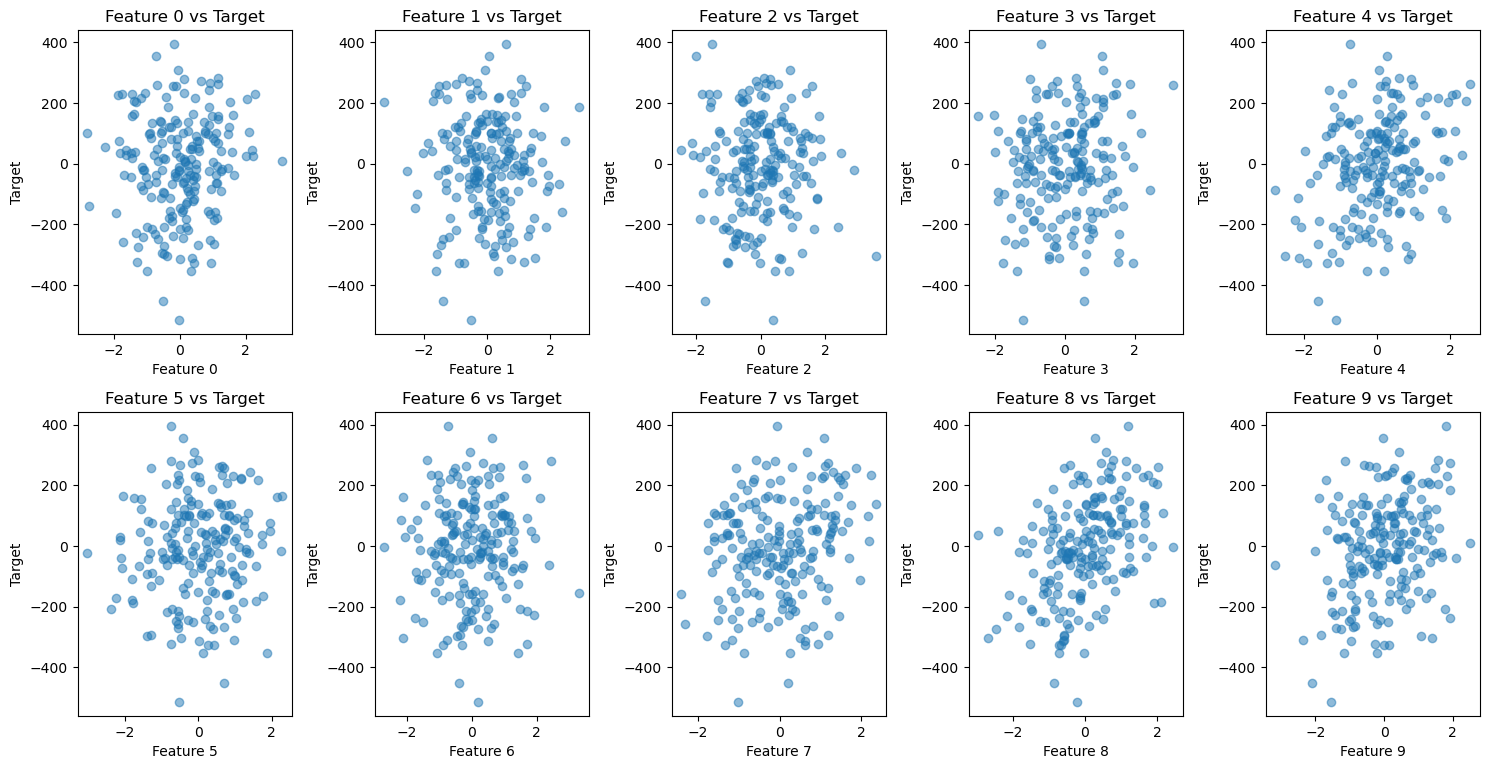

In [77]:
n_features = X.shape[1]


plt.figure(figsize=(15, 15))

for i in range(n_features):
    plt.subplot(4, 5, i+1)
    plt.scatter(X_chall[:, i], y_chall, alpha=0.5)
    plt.xlabel(f"Feature {i}")
    plt.ylabel("Target")
    plt.title(f"Feature {i} vs Target")

plt.tight_layout()
plt.show()

In [78]:
scaler= StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [79]:
## Train the custom linear regression model
model = LinearRegression(learning_rate=0.1, iterations=1000, lambda_=0.01)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(y_pred[:5])
print(y_test[:5])
print("\n")


## Train the scikit-learn linear regression model
sk_model = SKLinear()
sk_model.fit(X_train, y_train)
y_pred_sk = sk_model.predict(X_test)

print(y_pred_sk[:5])
print(y_test[:5])
print("\n")

# Get weights and bias
weights_sk = sk_model.coef_
bias_sk = sk_model.intercept_

# Compare weights
print(f"Custom Linear Regression weights: {model.weights}")
print(f"Scikit-Learn Linear Regression weights: {weights_sk}\n")

# Compare bias
print(f"Custom Linear Regression bias: {model.bias}")
print(f"Scikit-Learn Linear Regression  bias: {bias_sk}\n")


[  32.13273237   68.94326566   -8.64387285 -294.38325091   35.97335185]
[  -1.57191641  127.7797042   -25.09234811 -323.57732442   -4.68977776]


[  32.16434009   68.93119956   -8.65919317 -294.41859288   35.99658632]
[  -1.57191641  127.7797042   -25.09234811 -323.57732442   -4.68977776]


Custom Linear Regression weights: [34.95270212 30.44162744 27.87434357 73.18266214  6.16360457  7.43501661
 72.30256497  7.60804541  3.26288257 61.8429032 ]
Scikit-Learn Linear Regression weights: [34.97146814 30.45512741 27.88066562 73.1989587   6.16062627  7.42792731
 72.31831547  7.60252983  3.26606069 61.84777763]

Custom Linear Regression bias: 0.7560689863480228
Scikit-Learn Linear Regression  bias: 0.760579027170948



In [80]:
# Evaluate on train and test sets

mse_train, rmse_train = model.evaluate(X_train, y_train)
mse_test, rmse_test = model.evaluate(X_test, y_test)

baseline_pred = np.full_like(y_test, y_train.mean())
baseline_mse = np.sum((y_test - baseline_pred) ** 2) / (2 * y_test.shape[0])
baseline_rmse = np.sqrt(np.mean((y_test - baseline_pred) ** 2))

print("=== Custom Linear Regression ===")
print(f"Training MSE : {mse_train:.4f}, RMSE: {rmse_train:.4f}")
print(f"Test MSE     : {mse_test:.4f}, RMSE: {rmse_test:.4f}")
print(f"Baseline MSE : {baseline_mse:.4f}, RMSE: {baseline_rmse:.4f}")
print(f"Target range : {y_test.min():.2f} to {y_test.max():.2f}")

# Evaluate scikit-learn model

# Training predictions
y_train_pred_sk = sk_model.predict(X_train)
mse_train_sk = np.sum((y_train - y_train_pred_sk)**2) / (2 * y_train.shape[0])
rmse_train_sk = np.sqrt(np.mean((y_train - y_train_pred_sk)**2))

# Test predictions
y_test_pred_sk = sk_model.predict(X_test)
mse_test_sk = np.sum((y_test - y_test_pred_sk)**2) / (2 * y_test.shape[0])
rmse_test_sk = np.sqrt(np.mean((y_test - y_test_pred_sk)**2))

# Baseline using mean of training targets
baseline_pred_sk = np.full_like(y_test, y_train.mean())
baseline_mse_sk = np.sum((y_test - baseline_pred_sk) ** 2) / (2 * y_test.shape[0])
baseline_rmse_sk = np.sqrt(np.mean((y_test - baseline_pred_sk) ** 2))

print("=== Scikit-Learn Linear Regression ===")
print(f"Training MSE : {mse_train_sk:.4f}, RMSE: {rmse_train_sk:.4f}")
print(f"Test MSE     : {mse_test_sk:.4f}, RMSE: {rmse_test_sk:.4f}")
print(f"Baseline MSE : {baseline_mse_sk:.4f}, RMSE: {baseline_rmse_sk:.4f}")
print(f"Target range : {y_test.min():.2f} to {y_test.max():.2f}")

=== Custom Linear Regression ===
Training MSE : 1158.5139, RMSE: 48.1355
Test MSE     : 1188.8599, RMSE: 48.7619
Baseline MSE : 9295.6872, RMSE: 136.3502
Target range : -323.58 to 311.27
=== Scikit-Learn Linear Regression ===
Training MSE : 1158.5133, RMSE: 48.1355
Test MSE     : 1188.9894, RMSE: 48.7645
Baseline MSE : 9295.6872, RMSE: 136.3502
Target range : -323.58 to 311.27


After training both the custom Linear Regression model and the scikit-learn implementation, we observe that the evaluation metrics are nearly identical. Both models achieve the same level of performance on the training and test sets, with training and test RMSE values around 48.7, which is much lower than the baseline RMSE of 136.35.

This indicates that the custom implementation correctly replicates the behavior of scikit-learn’s Linear Regression. The negligible differences in MSE and RMSE are due to small numerical differences and the random initialization of weights in the custom model.

Overall, this comparison validates that the gradient descent, weight updates, and evaluation functions in the custom model are functioning correctly and producing results equivalent to a well-tested library implementation.

## Linear Regression: Implementation Check & Evaluation


In [81]:
## Create Dataset
X, y = make_classification(
    n_samples=1000,
    n_features=5,
    n_informative=3,
    n_redundant=0,
    n_classes=2,
    weights=[0.55, 0.45],
    random_state=42
)
print(X[:5])
print(y[:5])

[[-0.52933211 -0.09338686 -1.52657236  0.4068465  -0.61969946]
 [-0.97849955 -1.69067163  1.22930785 -0.70307052  0.20205497]
 [-2.1715714   0.54578671  1.25343301  1.52772557  1.78078504]
 [-0.15129922 -0.36550594  1.33571369  0.03835504 -0.00531744]
 [-0.77737148  1.14603014 -2.47934266  0.29701431  1.51852217]]
[0 1 1 1 0]


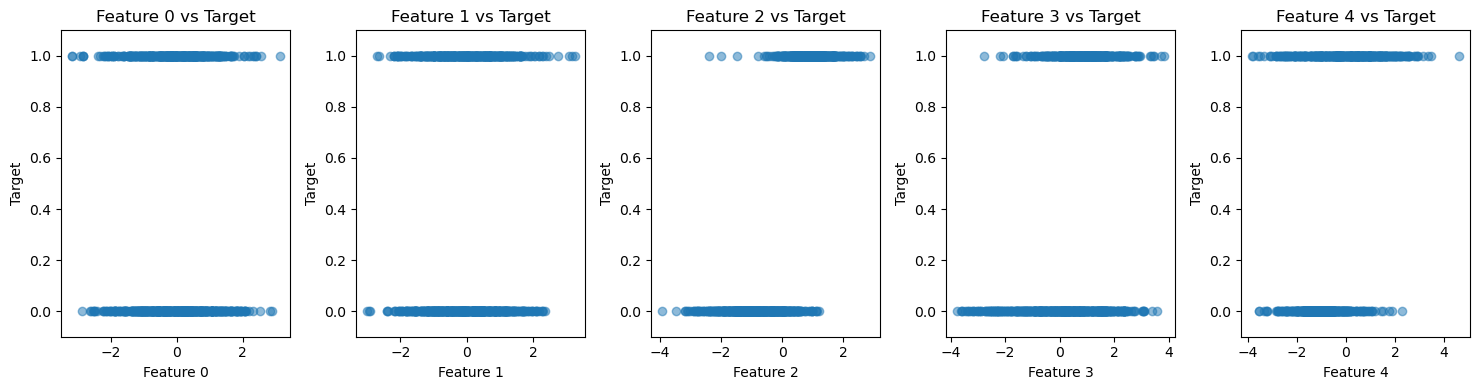

In [82]:
n_features = X.shape[1]

plt.figure(figsize=(15, 4))

for i in range(n_features):
    plt.subplot(1, n_features, i+1)

    plt.scatter(X[:, i], y, alpha=0.5)
    plt.xlabel(f"Feature {i}")
    plt.ylabel("Target")
    plt.title(f"Feature {i} vs Target")
    plt.ylim(-0.1, 1.1)

plt.tight_layout()
plt.show()

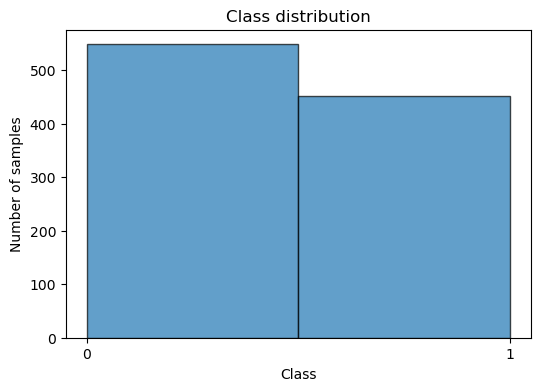

In [83]:
plt.figure(figsize=(6,4))
plt.hist(y, bins=2, edgecolor='black', alpha=0.7)
plt.xticks([0, 1])
plt.xlabel("Class")
plt.ylabel("Number of samples")
plt.title("Class distribution")
plt.show()

In [84]:
## Split Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [86]:
model = LogisticRegression(learning_rate=0.1, iterations=1000, lambda_=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

threshold = 0.5

# Convert probabilities to class labels
y_pred_class = (y_pred > threshold).astype(int)

print(y_pred[:5])
print(y_pred_class[:5])
print(y_test[:5])

print(model.weights)
print(model.bias)

[0.36099126 0.38392353 0.01081566 0.07231236 0.78972174]
[0 0 0 0 1]
[1 0 0 0 1]
[0.00443196 0.00813578 2.31646291 0.40336341 0.91239381]
-0.2869191157044724


In [87]:
# Evaluate model
accuracy = model.evaluate(X_test, y_test)

print("=== Logistic Regression ===")
print(f"Accuracy: {accuracy:.4f}")

=== Logistic Regression ===
Accuracy: 0.9350
